In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("E:/Alsayad Electronics/Downloads/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Figure size 300x300 with 0 Axes>

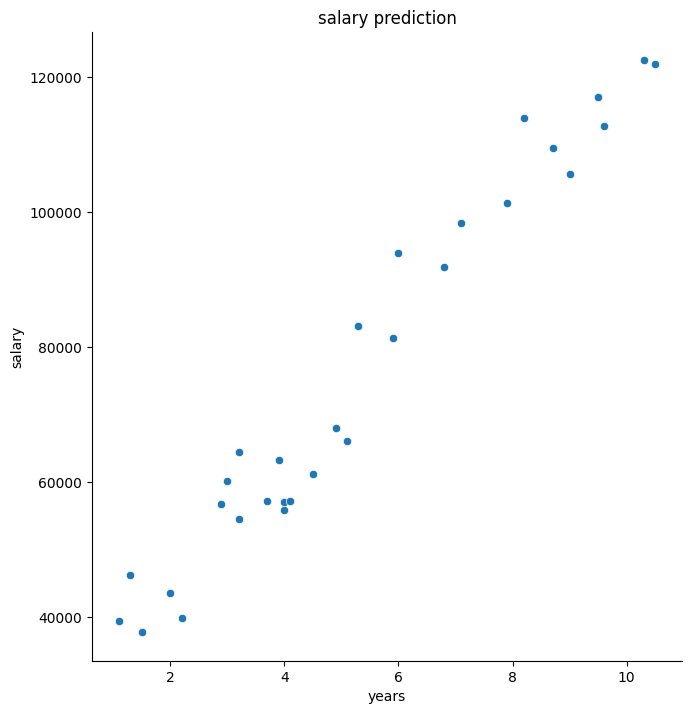

In [5]:
plt.figure(figsize=(3,3))
sns.pairplot(data,x_vars=["YearsExperience"],y_vars=["Salary"],size=7,kind="scatter")
plt.xlabel("years")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()
 

In [8]:
x = data.iloc[:,:-1]
y = data.iloc[:,1]
x_train , x_test , y_train , y_test = train_test_split(x,y, train_size= 0.8 , random_state=52)


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train , y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
y_poly_pred_train = poly_model.predict(x_poly_train)
y_poly_pred_test = poly_model.predict(x_poly_test)

In [13]:
x_range = np.linspace(x.min(),x.max(),100).reshape(-1 , 1)
x_range_poly = poly.transform(x_range)
y_range_pred = poly_model.predict(x_range_poly)

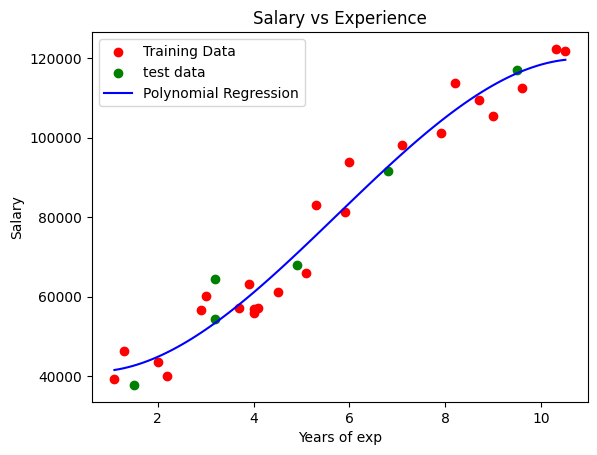

In [14]:
plt.scatter(x_train,y_train,color= "red",label="Training Data")
plt.scatter(x_test,y_test ,color="green",label='test data')
plt.plot(x_range,y_range_pred,color="blue",label="Polynomial Regression")
plt.title("Salary vs Experience")
plt.xlabel("Years of exp")
plt.ylabel("Salary")
plt.legend()
plt.show()